# Predictive modeling for predicting marketing campaign outcome 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





In [2]:
# Step 2: Read the CSV files into pandas DataFrames
purchase_history_df = pd.read_csv('purchase_history.csv')
marketing_campaigns_df = pd.read_csv('marketing_campaigns.csv')
customer_data_df = pd.read_csv('customer_data.csv')

# Step 3: Merge the DataFrames based on the CustomerID attribute
union_df = pd.merge(purchase_history_df, marketing_campaigns_df, on='CustomerID')
union_df = pd.merge(union_df, customer_data_df, on='CustomerID')

# Step 4: Preprocess the data
# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
categorical_columns = ['Product', 'Campaign', 'Outcome', 'Gender']

In [3]:

for column in categorical_columns:
    le = LabelEncoder()
    union_df[column] = le.fit_transform(union_df[column])
    label_encoders[column] = le

# Handling missing values if any
union_df.fillna(method='ffill', inplace=True)

# Convert datetime columns to Unix timestamps
union_df['InteractionDate'] = pd.to_datetime(union_df['InteractionDate']).apply(lambda x: x.timestamp())
union_df['PurchaseDate'] = pd.to_datetime(union_df['PurchaseDate']).apply(lambda x: x.timestamp())


In [4]:

# Select only numerical columns for scaling
numerical_columns = ['Price', 'Quantity', 'Age', 'InteractionDate', 'PurchaseDate']
non_numerical_columns = [col for col in union_df.columns if col not in numerical_columns and col != 'Outcome']

# Standardize numerical features
scaler = StandardScaler()
union_df[numerical_columns] = scaler.fit_transform(union_df[numerical_columns])

# Define features and target, excluding non-numerical columns and Outcome
X = union_df.drop(columns=non_numerical_columns + ['Outcome'])
y = union_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.21995708154506438
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       271
           1       0.17      0.18      0.17       200
           2       0.27      0.26      0.26       228
           3       0.22      0.47      0.30       233

    accuracy                           0.22       932
   macro avg       0.16      0.23      0.19       932
weighted avg       0.16      0.22      0.18       932



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

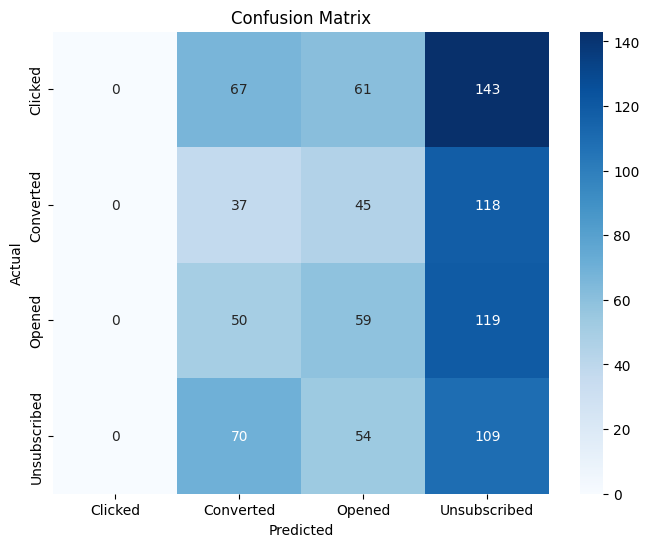

In [5]:
# Step 5: Develop a predictive model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Outcome'].classes_, yticklabels=label_encoders['Outcome'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:

# Function to predict and summarize the outcome
def predict_and_summarize(model, scaler, label_encoders, new_data):
    # Create a DataFrame for new data
    new_data_df = pd.DataFrame([new_data])

    # Ensure all columns used during training are present
    for column in numerical_columns + non_numerical_columns:
        if column not in new_data_df.columns:
            new_data_df[column] = np.nan
    
    # Fill missing values with a strategy (here using forward fill)
    new_data_df.fillna(method='ffill', inplace=True)
    
    # Encode categorical data
    for column in categorical_columns:
        if column in new_data_df.columns:
            le = label_encoders[column]
            new_data_df[column] = le.transform(new_data_df[column])
    
    # Convert datetime columns to Unix timestamps
    if 'InteractionDate' in new_data_df.columns:
        new_data_df['InteractionDate'] = pd.to_datetime(new_data_df['InteractionDate']).apply(lambda x: x.timestamp())
    if 'PurchaseDate' in new_data_df.columns:
        new_data_df['PurchaseDate'] = pd.to_datetime(new_data_df['PurchaseDate']).apply(lambda x: x.timestamp())
    
    # Standardize numerical features
    new_data_df[numerical_columns] = scaler.transform(new_data_df[numerical_columns])
    
    # Ensure the order of columns matches training data
    new_data_df = new_data_df[X.columns]

    # Predict the outcome
    prediction = model.predict(new_data_df)[0]
    outcome = label_encoders['Outcome'].inverse_transform([prediction])[0]
    
    # Display the result
    print("Predicted Outcome:", outcome)
    print("Details of the input data:")
    for key, value in new_data.items():
        print(f"{key}: {value}")


In [7]:
# Testing Model

In [8]:

# Test the function with some random data
new_data = {
    'CustomerID': 1,
    'Product': 'Laptop',
    'Price': 700,
    'Quantity': 2,
    'PurchaseDate': '2024-05-01 12:30',
    'Campaign': 'Email',
    'InteractionDate': '2024-05-01 14:00',
    'Gender': 'Male',
    'Age': 30
}

predict_and_summarize(model, scaler, label_encoders, new_data)



Predicted Outcome: Unsubscribed
Details of the input data:
CustomerID: 1
Product: Laptop
Price: 700
Quantity: 2
PurchaseDate: 2024-05-01 12:30
Campaign: Email
InteractionDate: 2024-05-01 14:00
Gender: Male
Age: 30
